In [1]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Importing Stock market data from the Internet

from pandas.io.data import DataReader

/home/srikanth/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [4]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
# Importing Apple Stock Prices

AAPL = DataReader('AAPL','yahoo',start,end)

In [6]:
# Some Basic info about the Apple Stock

AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,120.296414,121.364900,118.981992,120.154382,5.190328e+07,119.149558
std,7.570619,7.338880,7.807430,7.568283,2.114972e+07,7.305361
min,94.870003,107.370003,92.000000,103.120003,1.302370e+07,102.680478
25%,113.634998,114.549999,112.189999,113.469998,3.750845e+07,112.986358
50%,120.800003,121.809998,119.449997,120.529999,4.709970e+07,120.016268
75%,127.165001,127.934998,125.985000,126.915001,5.969045e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


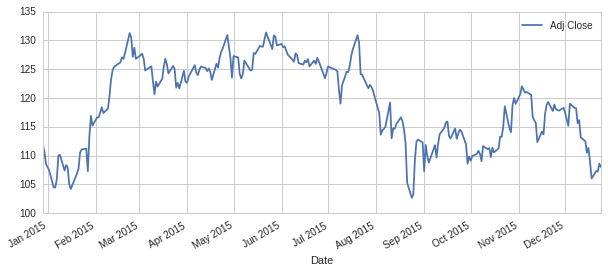

In [7]:
# Plotting Adjusted Closing price for Apple Stock

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

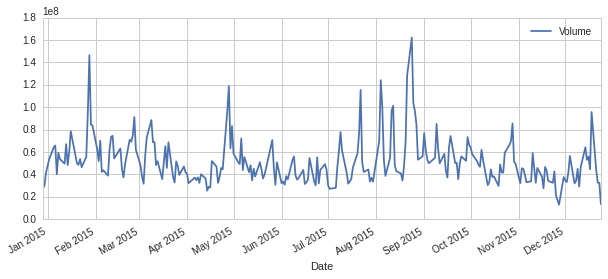

In [8]:
# Plotting the total volume of stock being traded each day

AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [9]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

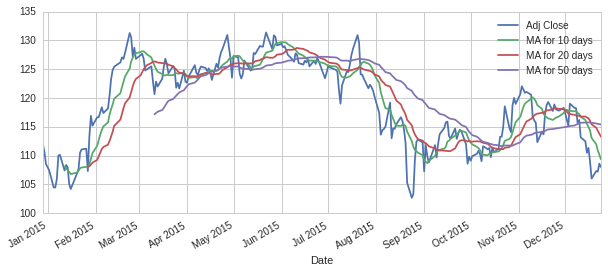

In [10]:
# Plotting the moving averages

AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

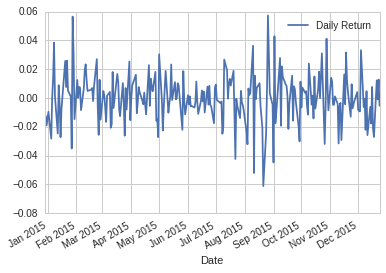

In [11]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True)

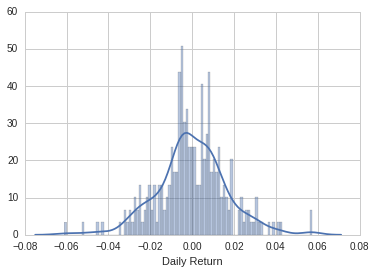

In [12]:
# Plotting the average daily returns of the stock

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

/home/srikanth/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


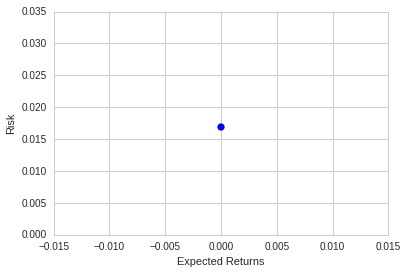

In [13]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = AAPL['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

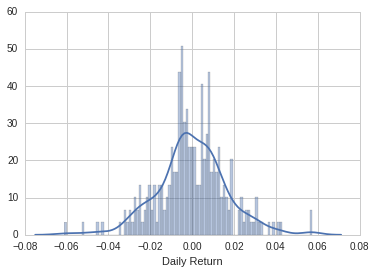

In [14]:
# Visualizing the Value at Risk

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [15]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

AAPL['Daily Return'].quantile(0.05)

-0.027102627581681943

In [16]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [17]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [18]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-12-29,113.790001,114.769997,113.699997,113.910004,27598900,112.001681,NaN,NaN,NaN,NaN
2014-12-30,113.639999,113.919998,112.110001,112.519997,29881500,110.634961,NaN,NaN,NaN,-0.012203
2014-12-31,112.820000,113.129997,110.209999,110.379997,41403400,108.530812,NaN,NaN,NaN,-0.019019
2015-01-02,111.389999,111.440002,107.349998,109.330002,53204600,107.498407,NaN,NaN,NaN,-0.009513
2015-01-05,108.290001,108.650002,105.410004,106.250000,64285500,104.470005,NaN,NaN,NaN,-0.028172


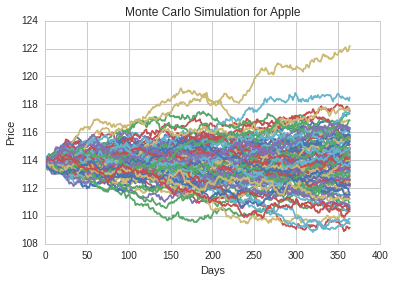

In [19]:
# Running the Monte Carlo simulation a hundred times

start_price = 113.790001

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Apple')

In [20]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

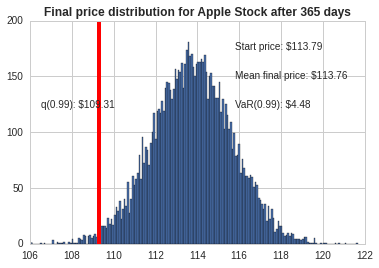

In [21]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');